<a href="https://colab.research.google.com/github/handetushar/Airline-Passenger-Referral-Prediction/blob/main/Individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline Passenger Referral Prediction**

## **Problem Statement**
Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. 
The main objective is to predict whether passengers will refer the airline to their friends.

## **Data Description**
Feature descriptions briefly as follows:<br>
airline: Name of the airline.<br>
overall: Overall point is given to the trip between 1 to 10.<br>
author: Author of the trip<br>
reviewdate: Date of the Review customer review: Review of the customers in free text format<br>
aircraft: Type of the aircraft<br>
travellertype: Type of traveler (e.g. business, leisure)<br>
cabin: Cabin at the flight date flown: Flight date<br>
seatcomfort: Rated between 1-5<br>
cabin service: Rated between 1-5<br>
foodbev: Rated between 1-5 entertainment: Rated between 1-5<br>
groundservice: Rated between 1-5<br>
valueformoney: Rated between 1-5<br>
recommended: Binary, target variable.

## Importing dependencies

In [1]:
# Importing liabraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
import re
import nltk
from nltk.stem.snowball import SnowballStemmer

In [3]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
stop_words=stopwords.words('english')

In [5]:
from sklearn.model_selection import train_test_split

## Importing the dataframe.

In [6]:
df=pd.read_excel('/content/drive/MyDrive/AlmaBetter/Projects/Supervised ML Classification/data_airline_reviews.xlsx')

In [7]:
# display first five rows
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Check the shape of the dataset
df.shape

(131895, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [10]:
# Checking the % of Null values and duplicate values if any
print(df.isnull().sum()/len(df)*100)

airline            50.000379
overall            51.463664
author             50.000379
review_date        50.000379
customer_review    50.000379
aircraft           85.050229
traveller_type     69.858600
cabin              52.005004
route              69.880587
date_flown         69.951097
seat_comfort       53.992949
cabin_service      53.967171
food_bev           60.113727
entertainment      66.493802
ground_service     70.159597
value_for_money    51.495508
recommended        51.142955
dtype: float64


In [11]:
# Drooping Null values if the complete row is empty
df.dropna(axis=0, how='all', inplace=True)

In [12]:
# size of the dataset after dropping the null rows
df.shape

(65947, 17)

In [13]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [14]:
#Check duplicates
df.duplicated().sum()

4764

In [15]:
df.drop_duplicates(inplace= True)

In [16]:
df.duplicated().sum()

0

In [17]:
# % after dropping the null values and duplicates
print(df.isnull().sum()/len(df)*100)

airline             0.000000
overall             2.912574
author              0.000000
review_date         0.000000
customer_review     0.000000
aircraft           69.782456
traveller_type     38.643087
cabin               4.050145
route              38.687217
date_flown         38.816338
seat_comfort        8.126440
cabin_service       8.079042
food_bev           20.989491
entertainment      34.246441
ground_service     39.249465
value_for_money     3.033522
recommended         2.324175
dtype: float64


In [18]:
df.shape

(61183, 17)

In [19]:
df['recommended'].value_counts()

no     31268
yes    28493
Name: recommended, dtype: int64

Text(0, 0.5, 'Count')

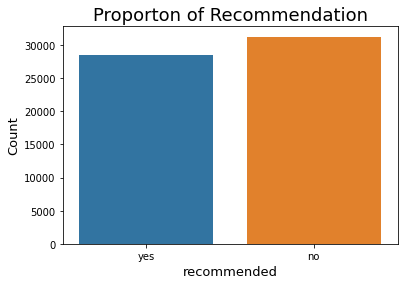

In [20]:
ax=sns.countplot(df['recommended'])
ax.set_title('Proporton of Recommendation', fontsize=18)
ax.set_xlabel("recommended",fontsize=13)
ax.set_ylabel("Count",fontsize=13)

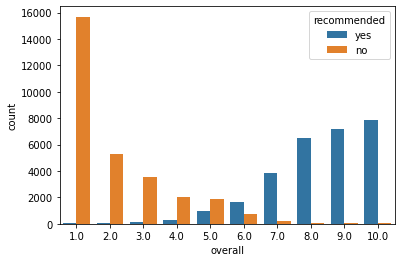

In [21]:
sns.countplot(df['overall'], hue=df['recommended']);

In [22]:
df[['overall', 'recommended']].isnull().sum()

overall        1782
recommended    1422
dtype: int64

In [23]:
df['overall'].isna()

1         False
3         False
5         False
7         False
9         False
          ...  
131886     True
131888     True
131890     True
131892     True
131894     True
Name: overall, Length: 61183, dtype: bool

In [24]:
df.dropna(how = 'all', subset = ['recommended'], inplace = True)

In [25]:
df['airline'].value_counts()

Spirit Airlines       2808
American Airlines     2756
United Airlines       2715
British Airways       2644
Emirates              1716
                      ... 
QantasLink             102
Adria Airways           83
Air Arabia              80
Tunisair                71
Thai Smile Airways      47
Name: airline, Length: 81, dtype: int64

In [26]:
df['customer_review'].head()

1    âœ… Trip Verified | London to Izmir via Istanb...
3    âœ… Trip Verified | Istanbul to Bucharest. We ...
5    âœ… Trip Verified | Rome to Prishtina via Ista...
7    âœ… Trip Verified | Flew on Turkish Airlines I...
9    âœ… Trip Verified | Mumbai to Dublin via Istan...
Name: customer_review, dtype: object

In [27]:
stop_word=stopwords.words('english')

In [28]:
df[['customer_review', 'recommended']]

,customer_review,recommended
1,âœ… Trip Verified | London to Izmir via Istanb...,yes
3,âœ… Trip Verified | Istanbul to Bucharest. We ...,no
5,âœ… Trip Verified | Rome to Prishtina via Ista...,no
7,âœ… Trip Verified | Flew on Turkish Airlines I...,yes
9,âœ… Trip Verified | Mumbai to Dublin via Istan...,no
...,...,...
131886,Two domestic flights between Kiev and Lviv las...,no
131888,I had a good flight from London to Kiev with U...,no
131890,Kiev - London (Gatwick) in business class (in ...,no
131892,Several flights - KBP to AMS (3 times one way)...,no


In [29]:
# import re for regularExpression
# importing natural language toolkit
import re
import nltk
import string
from nltk import pos_tag
# importing stopwords from nitk corpus
from nltk.corpus import stopwords
from nltk.corpus import wordnet
# downloading all stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [30]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [31]:
# Returning the wordnet object value corresponding to the POS tag
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def text_cleaning(data):

  # Remove single characters from the start
  processed_feature = re.sub('[^a-zA-Z]', ' ', data) 

  # Substituting multiple spaces with single space
  processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

  # Converting to Lowercase
  processed_feature = processed_feature.lower()

  processed_feature = processed_feature.split(' ')
  
   # removing stopword
  stop_words=set(stopwords.words('english'))
  stop_words.remove('not')
  processed_feature = [i for i in processed_feature if i not in stop_words]

  # pos tag text
  pos_tags = pos_tag(processed_feature)

  # using lemmatization on words
  processed_feature = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
  # remove words with only two letter
  processed_feature = [t for t in processed_feature if len(t) > 2]

   # join all
  processed_feature = ' '.join(processed_feature)
  return processed_feature

In [32]:
# creating token of words with the help of text cleaning function
df['tokenized_review'] = df['customer_review'].apply(text_cleaning)

In [33]:
len(df['customer_review'][1])

1143

In [34]:
len(df['tokenized_review'][1])

740

In [35]:
df =df.reset_index(drop= ['index'])
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,tokenized_review
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes,trip verify london izmir via istanbul first ti...
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no,trip verify istanbul bucharest make check airp...
2,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no,trip verify rome prishtina via istanbul fly co...
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,trip verify flew turkish airline iad ist khi r...
4,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no,trip verify mumbai dublin via istanbul never b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59756,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,two domestic flight kiev lviv last week troubl...
59757,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,good flight london kiev ukraine international ...
59758,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,kiev london gatwick business class april flown...
59759,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,several flight kbp ams time one way lgw zrh tw...


In [36]:
#Text Vecorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=6000)

In [37]:
df['recommended'] = df['recommended'].replace({'yes': 1, 'no': 0})

In [38]:
#Input and Output Features
X = tfidf.fit_transform(df['tokenized_review']).toarray()
y = df['recommended'].values

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [41]:
#Imports Lib
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [42]:
import time
# Importing  metrics for evaluation for our models
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [43]:
#Declare the models
lr_model=LogisticRegression()
pac_model=PassiveAggressiveClassifier()
gb_model = GradientBoostingClassifier(n_estimators = 50,max_depth = 6,min_samples_split = 10,min_samples_leaf = 30)
rf_model=RandomForestClassifier()
gnb_model = GaussianNB()
Mnb_model=MultinomialNB()


#Create a list of models
models=[lr_model,pac_model,gb_model,gnb_model,Mnb_model,rf_model]

#Creating dictionay for storing the confustion matix
dct_train={}
dct_test={}
lst_imp=[]
# Fuction for calculation the eveluation matrix
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #Read model one by one
    for model in models:
        start = time.time()
        model.fit(X_train,y_train)
        end= time.time()
        y_pred=model.predict(X_test)
        y_pred_train=model.predict(X_train)
        
        #Compute metrics
        train_accuracy=accuracy_score(y_train,y_pred_train)
        test_accuracy=accuracy_score(y_test,y_pred)
        p_score_train=precision_score(y_train,y_pred_train)
        p_score=precision_score(y_test,y_pred)
        r_score_train=recall_score(y_train,y_pred_train)
        r_score=recall_score(y_test,y_pred)
        train_auc = roc_auc_score(y_train,y_pred_train)
        test_auc = roc_auc_score(y_test,y_pred)
        fp, tp, th = roc_curve(y_test, y_pred)
        
        #Insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Train_Accuracy"]=round(train_accuracy*100,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy*100,2)
        df.loc[i,"Precision_Train"]=round(p_score_train*100,2)
        df.loc[i,"Precision_Test"]=round(p_score*100,2)
        df.loc[i,"Recall_Train"]=round(r_score_train*100,2)
        df.loc[i,"Recall_test"]=round(r_score*100,2)
        df.loc[i,"ROC_AUC_Train"]=round(train_auc*100,2)
        df.loc[i,"ROC_AUC_Test"]=round(test_auc*100,2)
        df.loc[i,'AUC'] = auc(fp, tp)
        df.loc[i,'MOdel_training_time ']= end-start
        #Inserted in dictionary
        dct_train[model.__class__.__name__]=confusion_matrix(y_train,y_pred_train)
        dct_test[model.__class__.__name__]=confusion_matrix(y_test,y_pred)

        i+=1
    # Return the data frame and dictionary
    return df,dct_train,dct_test

In [44]:
# Get performance matrix dataframe for different classifiers.
final_result_df,dct_train,dct_test=score_model(X_train,y_train,X_test,y_test)

In [45]:
#  Get performance on different models
final_result_df

,Model_Name,Train_Accuracy,Test_Accuracy,Precision_Train,Precision_Test,Recall_Train,Recall_test,ROC_AUC_Train,ROC_AUC_Test,AUC,MOdel_training_time
0,LogisticRegression,92.50,91.38,92.72,91.42,91.47,90.32,92.45,91.33,0.913312,44.658776
1,PassiveAggressiveClassifier,94.05,88.77,91.46,85.94,96.54,91.27,94.15,88.89,0.888942,23.619645
2,GradientBoostingClassifier,88.76,87.24,89.07,87.27,87.14,85.59,88.69,87.16,0.871615,1167.215859
3,GaussianNB,82.68,79.90,78.63,76.11,87.49,84.02,82.89,80.10,0.801050,4.016248
4,MultinomialNB,86.01,85.55,83.85,83.38,87.56,86.86,86.08,85.62,0.856155,1.097825
5,RandomForestClassifier,99.99,88.54,99.98,87.84,100.00,88.03,99.99,88.51,0.885136,187.706834
